## 1. Importing library 

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [49]:
# Importing the data
df_unscaled = pd.read_csv(r'C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data sets\\unscaled_cleaned.csv')
df_answers = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Data Sets\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [50]:
# We convert the date to time

df_unscaled['DATE'] = pd.to_datetime(df_unscaled['DATE'], format='%Y%m%d')
df_answers['DATE'] = pd.to_datetime(df_answers['DATE'], format='%Y%m%d')

In [51]:
# Reducing data to 90s decade
answers_90 = df_answers[df_answers['DATE'].astype(str).str.contains('199')]
unscaled_90 = df_unscaled[df_unscaled['DATE'].astype(str).str.contains('199')]

## Data cleaning

In [52]:
# We drop unnecessary columns
df_answers_90 = answers_90.drop('DATE', axis=1)

In [53]:
# We drop unnecessary columns
unscaled_90_clean = unscaled_90.drop(['Unnamed: 0','DATE','MONTH'],axis=1)

In [54]:
# Exporting the data to csv
unscaled_90_clean.to_csv('C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data sets\\unscaled_cleaned_90.csv')
df_answers_90.to_csv('C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data sets\\pleasant_weather_answers_90.csv')

In [55]:
df_answers_90.shape

(3652, 15)

In [56]:
df_answers_90.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
10958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
unscaled_90_clean.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,0,2.1,0.83,1.0217,0.60,7.2,-2.1,-3.6,1.2,2,...,-4.2,-0.3,3,0.82,1.0068,0.20,2.0,6.9,4.5,9.4
10959,2,2.1,0.84,1.0238,0.48,2.3,-1.8,-3.9,1.7,8,...,-5.0,-3.4,5,0.79,1.0040,0.21,0.1,7.3,4.7,9.9
10960,8,2.1,0.89,1.0231,0.20,0.0,-2.2,-4.2,0.4,5,...,-4.9,-2.6,4,0.90,1.0094,0.38,4.9,7.8,4.8,10.7
10961,2,2.1,0.77,1.0265,0.54,5.6,-0.7,-3.1,2.2,5,...,-2.6,0.5,6,0.93,1.0112,0.13,0.0,6.5,2.0,11.0
10962,7,2.1,0.81,1.0286,0.23,0.2,0.0,-3.1,2.6,0,...,-0.8,0.8,4,0.91,1.0108,0.20,1.2,9.4,7.2,11.7


In [58]:
unscaled_90_clean.shape

(3652, 133)

In [59]:
tf.random.set_seed(42)

In [60]:
signals = [
    "BASEL_cloud_cover",
    "BASEL_wind_speed",
    "BASEL_humidity",
    "BASEL_pressure",
    "BASEL_global_radiation",
    "BASEL_sunshine",
    "BASEL_temp_mean",
    "BASEL_temp_min",
    "BASEL_temp_max",
    "BELGRADE_cloud_cover",
    "BELGRADE_humidity",
    "BELGRADE_pressure",
    "BELGRADE_global_radiation",
    "BELGRADE_precipitation",
    "BELGRADE_sunshine",
    "BELGRADE_temp_mean",
    "BELGRADE_temp_min",
    "BELGRADE_temp_max",
    "BUDAPEST_cloud_cover",
    "BUDAPEST_humidity",
    "BUDAPEST_pressure",
    "BUDAPEST_global_radiation",
    "BUDAPEST_precipitation",
    "BUDAPEST_sunshine",
    "BUDAPEST_temp_mean",
    "BUDAPEST_temp_min",
    "BUDAPEST_temp_max",
    "DEBILT_cloud_cover",
    "DEBILT_wind_speed",
    "DEBILT_humidity",
    "DEBILT_pressure",
    "DEBILT_global_radiation",
    "DEBILT_precipitation",
    "DEBILT_sunshine",
    "DEBILT_temp_mean",
    "DEBILT_temp_min",
    "DEBILT_temp_max",
    "DUSSELDORF_cloud_cover",
    "DUSSELDORF_wind_speed",
    "DUSSELDORF_humidity",
    "DUSSELDORF_pressure",
    "DUSSELDORF_global_radiation",
    "DUSSELDORF_sunshine",
    "DUSSELDORF_temp_mean",
    "DUSSELDORF_temp_min",
    "DUSSELDORF_temp_max",
    "HEATHROW_cloud_cover",
    "HEATHROW_humidity",
    "HEATHROW_pressure",
    "HEATHROW_global_radiation",
    "HEATHROW_sunshine",
    "HEATHROW_temp_mean",
    "HEATHROW_temp_min",
    "HEATHROW_temp_max",
    "KASSEL_wind_speed",
    "KASSEL_humidity",
    "KASSEL_pressure",
    "KASSEL_global_radiation",
    "KASSEL_precipitation",
    "KASSEL_sunshine",
    "KASSEL_temp_mean",
    "KASSEL_temp_min",
    "KASSEL_temp_max",
    "LJUBLJANA_cloud_cover",
    "LJUBLJANA_wind_speed",
    "LJUBLJANA_humidity",
    "LJUBLJANA_pressure",
    "LJUBLJANA_global_radiation",
    "LJUBLJANA_precipitation",
    "LJUBLJANA_sunshine",
    "LJUBLJANA_temp_mean",
    "LJUBLJANA_temp_min",
    "LJUBLJANA_temp_max",
    "MAASTRICHT_cloud_cover",
    "MAASTRICHT_wind_speed",
    "MAASTRICHT_humidity",
    "MAASTRICHT_pressure",
    "MAASTRICHT_global_radiation",
    "MAASTRICHT_precipitation",
    "MAASTRICHT_sunshine",
    "MAASTRICHT_temp_mean",
    "MAASTRICHT_temp_min",
    "MAASTRICHT_temp_max",
    "MADRID_cloud_cover",
    "MADRID_wind_speed",
    "MADRID_humidity",
    "MADRID_pressure",
    "MADRID_global_radiation",
    "MADRID_precipitation",
    "MADRID_sunshine",
    "MADRID_temp_mean",
    "MADRID_temp_min",
    "MADRID_temp_max",
    "MUNCHENB_cloud_cover",
    "MUNCHENB_humidity",
    "MUNCHENB_global_radiation",
    "MUNCHENB_sunshine",
    "MUNCHENB_temp_mean",
    "MUNCHENB_temp_min",
    "MUNCHENB_temp_max",
    "OSLO_cloud_cover",
    "OSLO_wind_speed",
    "OSLO_humidity",
    "OSLO_pressure",
    "OSLO_global_radiation",
    "OSLO_sunshine",
    "OSLO_temp_mean",
    "OSLO_temp_min",
    "OSLO_temp_max",
    "SONNBLICK_cloud_cover",
    "SONNBLICK_wind_speed",
    "SONNBLICK_humidity",
    "SONNBLICK_pressure",
    "SONNBLICK_global_radiation",
    "SONNBLICK_precipitation",
    "SONNBLICK_sunshine",
    "SONNBLICK_temp_mean",
    "SONNBLICK_temp_min",
    "SONNBLICK_temp_max",
    "STOCKHOLM_cloud_cover",
    "STOCKHOLM_pressure",
    "STOCKHOLM_global_radiation",
    "STOCKHOLM_temp_mean",
    "STOCKHOLM_temp_min",
    "STOCKHOLM_temp_max",
    "VALENTIA_cloud_cover",
    "VALENTIA_humidity",
    "VALENTIA_pressure",
    "VALENTIA_global_radiation",
    "VALENTIA_sunshine",
    "VALENTIA_temp_mean",
    "VALENTIA_temp_min",
    "VALENTIA_temp_max"
]

In [61]:
pleasurability = {
    0: 'BASEL_pleasant_weather',
    1: 'BELGRADE_pleasant_weather',
    2: 'BUDAPEST_pleasant_weather',
    3: 'DEBILT_pleasant_weather',
    4: 'DUSSELDORF_pleasant_weather',
    5: 'HEATHROW_pleasant_weather',
    6: 'KASSEL_pleasant_weather',
    7: 'LJUBLJANA_pleasant_weather',
    8: 'MAASTRICHT_pleasant_weather',
    9: 'MADRID_pleasant_weather',
    10: 'MUNCHENB_pleasant_weather',
    11: 'OSLO_pleasant_weather',
    12: 'SONNBLICK_pleasant_weather',
    13: 'STOCKHOLM_pleasant_weather',
    14: 'VALENTIA_pleasant_weather'
}

In [28]:
def _read_csv(filename):
    return pd.read_csv(filename, sep=r'\s+', header=0)

def load_signals(subset):
    signals_data = []

    for signal in signals:
        filename = f'C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data sets\\unscaled_cleaned_90.csv'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 0, 2))

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data sets\\pleasant_weather_answers_90.csv'
    df = _read_csv(filename)
    
    y = df.iloc[:, 0].str.split(',', expand=True).iloc[:, 1:]
    
    return y.astype(float).to_numpy()

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [29]:
X_train, X_test, y_train, y_test = load_data()

In [31]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3652, 133, 1) (3652, 15)
(3652, 133, 1) (3652, 15)


In [32]:
#The X shape needs to be (3652, 133)
X_train = X_train.reshape(-1,133) #-1 means "whatever works"
print(X_train.shape)
X_train

(3652, 133)


array([['10958,0,2.1,0.83,1.0217,0.6,7.2,-2.1,-3.6,1.2,2,0.86,1.0246,0.19,0.0,5.3,-1.3,-5.3,3.7,8,0.8,1.0263,0.18,0.0,0.0,0.1,-0.8,0.6,8,1.0,0.9,1.0198,0.1,0.0,0.0,0.5,0.0,1.2,8,1.4,0.93,1.0196,0.12,0.0,0.6,0.0,1.0,8,0.92,1.016,0.13,0.0,4.5,2.6,9.9,2.3,0.94,1.0205,0.12,0.0,0.0,-1.3,-1.5,-0.7,8,1.1,0.8,1.0217,0.14,0.0,0.0,-1.5,-2.0,-0.6,8,1.5,0.96,1.0197,0.12,0.0,0.0,0.5,0.1,0.8,8,0.0,0.96,1.0215,0.29,0.65,0.0,7.7,7.0,8.4,2,0.89,0.71,7.4,-5.4,-8.0,-0.4,7,0.7,0.76,1.0241,0.04,0.0,-6.7,-11.9,-4.2,0,6.7,0.52,1.0321,0.99,0.0,8.6,-8.2,-9.7,-6.7,6,1.022,0.13,-2.9,-4.2,-0.3,3,0.82,1.0068,0.2,2.0,6.9,4.5,9.4',
        '10958,0,2.1,0.83,1.0217,0.6,7.2,-2.1,-3.6,1.2,2,0.86,1.0246,0.19,0.0,5.3,-1.3,-5.3,3.7,8,0.8,1.0263,0.18,0.0,0.0,0.1,-0.8,0.6,8,1.0,0.9,1.0198,0.1,0.0,0.0,0.5,0.0,1.2,8,1.4,0.93,1.0196,0.12,0.0,0.6,0.0,1.0,8,0.92,1.016,0.13,0.0,4.5,2.6,9.9,2.3,0.94,1.0205,0.12,0.0,0.0,-1.3,-1.5,-0.7,8,1.1,0.8,1.0217,0.14,0.0,0.0,-1.5,-2.0,-0.6,8,1.5,0.96,1.0197,0.12,0.0,0.0,0.5,0.1,0.8,8,0.0,0.96

In [33]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
#Use argmax to get rid of on-hot encoding and supply the numerical value.
y_train = np.argmax(y_train, axis = 1)
print(y_train.shape)
y_train

(3652,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
#The X shape needs to be (3652, 133)
X_test = X_test.reshape(-1,133) #-1 means "whatever works"
print(X_test.shape)
X_test

(3652, 133)


array([['10958,0,2.1,0.83,1.0217,0.6,7.2,-2.1,-3.6,1.2,2,0.86,1.0246,0.19,0.0,5.3,-1.3,-5.3,3.7,8,0.8,1.0263,0.18,0.0,0.0,0.1,-0.8,0.6,8,1.0,0.9,1.0198,0.1,0.0,0.0,0.5,0.0,1.2,8,1.4,0.93,1.0196,0.12,0.0,0.6,0.0,1.0,8,0.92,1.016,0.13,0.0,4.5,2.6,9.9,2.3,0.94,1.0205,0.12,0.0,0.0,-1.3,-1.5,-0.7,8,1.1,0.8,1.0217,0.14,0.0,0.0,-1.5,-2.0,-0.6,8,1.5,0.96,1.0197,0.12,0.0,0.0,0.5,0.1,0.8,8,0.0,0.96,1.0215,0.29,0.65,0.0,7.7,7.0,8.4,2,0.89,0.71,7.4,-5.4,-8.0,-0.4,7,0.7,0.76,1.0241,0.04,0.0,-6.7,-11.9,-4.2,0,6.7,0.52,1.0321,0.99,0.0,8.6,-8.2,-9.7,-6.7,6,1.022,0.13,-2.9,-4.2,-0.3,3,0.82,1.0068,0.2,2.0,6.9,4.5,9.4',
        '10958,0,2.1,0.83,1.0217,0.6,7.2,-2.1,-3.6,1.2,2,0.86,1.0246,0.19,0.0,5.3,-1.3,-5.3,3.7,8,0.8,1.0263,0.18,0.0,0.0,0.1,-0.8,0.6,8,1.0,0.9,1.0198,0.1,0.0,0.0,0.5,0.0,1.2,8,1.4,0.93,1.0196,0.12,0.0,0.6,0.0,1.0,8,0.92,1.016,0.13,0.0,4.5,2.6,9.9,2.3,0.94,1.0205,0.12,0.0,0.0,-1.3,-1.5,-0.7,8,1.1,0.8,1.0217,0.14,0.0,0.0,-1.5,-2.0,-0.6,8,1.5,0.96,1.0197,0.12,0.0,0.0,0.5,0.1,0.8,8,0.0,0.96

In [36]:
y_test = np.argmax(y_test, axis = 1)
print(y_test.shape)
y_test

(3652,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
len(X_train[0])

133

In [24]:
# First, let's clean the data
def preprocess_data(X):
    # If data is string type, convert to float
    if isinstance(X[0], str):
        try:
            # Replace commas with periods and split the string
            X = np.array([
                [float(val.replace(',', '.')) for val in row.split(',')]
                for row in X
            ])
        except ValueError as e:
            print("Error converting data:", e)
            print("Sample problematic data:", X[0])
    return X

# Preprocess the training data
X_train = preprocess_data(X_train)
print("X_train shape after preprocessing:", X_train.shape)
print("X_train dtype:", X_train.dtype)

X_train shape after preprocessing: (3652, 133)
X_train dtype: object


In [25]:
#GRID SEARCH

In [26]:
def preprocess_data(X):
    # Convert each row (if it's a string array) to float values
    processed_rows = []
    
    for row in X:
        if isinstance(row[0], str):  # Check if the first element is a string
            # If it's one long string, split it
            if ',' in row[0]:
                values = [float(x) for x in row[0].split(',')]
            else:
                values = [float(x) for x in row]
        else:
            values = row.astype(float)
        processed_rows.append(values)
    
    return np.array(processed_rows)

# Process the data
try:

    X_train_processed = preprocess_data(X_train)

    # Define a small grid
    grid_space = {
        'n_estimators': [50, 100],
        'max_depth': [10, None],
        'min_samples_split': [2, 5]
    }

    # Create the classifier
    clf = RandomForestClassifier(random_state=42)

    # Create and run GridSearchCV
    print("\nStarting grid search...")
    grid = GridSearchCV(
        estimator=clf,
        param_grid=grid_space,
        cv=3,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )

    # Time the grid search
    start = time.time()
    model_grid = grid.fit(X_train_processed, y_train)
    print('Search took %.2f minutes' % ((time.time() - start)/60))

    # Print results
    print("\nBest parameters:", model_grid.best_params_)
    print("Best cross-validation score: {:.3f}".format(model_grid.best_score_))

except Exception as e:
    print("\nError occurred:", str(e))
    print("\nDetailed error information:")
    import traceback
    traceback.print_exc()


Starting grid search...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\casbacar\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Search took 0.16 minutes

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.814


In [40]:
def preprocess_data(X):
    processed_rows = []
    for row in X:
        if isinstance(row, str) or (isinstance(row, np.ndarray) and isinstance(row[0], str)):
            if isinstance(row, str):
                values = [float(x) for x in row.split(',')]
            else:
                values = [float(x) for x in row[0].split(',')]
        else:
            values = row.astype(float)
        processed_rows.append(values)
    return np.array(processed_rows)

try:
    # Preprocess data
    print("Processing training data...")
    X_train_processed = preprocess_data(X_train)
    print("Training data shape:", X_train_processed.shape)
    
    print("\nProcessing test data...")
    X_test_processed = preprocess_data(X_test)
    print("Test data shape:", X_test_processed.shape)

    # Create the Random Forest classifier with more conservative parameters
    clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,  
        min_samples_split=5,  
        min_samples_leaf=2,   
        random_state=42
    )

    # Perform cross-validation
    print("\nPerforming 5-fold cross-validation...")
    cv_scores = cross_val_score(clf, X_train_processed, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Train the model
    print("\nTraining Random Forest classifier...")
    start_time = time.time()
    clf.fit(X_train_processed, y_train)
    print(f"Training completed in {time.time() - start_time:.2f} seconds")

    # Make predictions
    y_pred = clf.predict(X_test_processed)


except Exception as e:
    print("\nError occurred:", str(e))
    import traceback
    traceback.print_exc()

Processing training data...
Training data shape: (3652, 134)

Processing test data...
Test data shape: (3652, 134)

Performing 5-fold cross-validation...


C:\Users\casbacar\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.8002736  0.8125855  0.80547945 0.83150685 0.82191781]
Mean CV score: 0.8144 (+/- 0.0225)

Training Random Forest classifier...
Training completed in 4.98 seconds


In [41]:
pls = {
    0: 'BASEL_pleasant_weather',
    1: 'BELGRADE_pleasant_weather',
    2: 'BUDAPEST_pleasant_weather',
    3: 'DEBILT_pleasant_weather',
    4: 'DUSSELDORF_pleasant_weather',
    5: 'HEATHROW_pleasant_weather',
    6: 'KASSEL_pleasant_weather',
    7: 'LJUBLJANA_pleasant_weather',
    8: 'MAASTRICHT_pleasant_weather',
    9: 'MADRID_pleasant_weather',
    10: 'MUNCHENB_pleasant_weather',
    11: 'OSLO_pleasant_weather',
    12: 'SONNBLICK_pleasant_weather',
    13: 'STOCKHOLM_pleasant_weather',
    14: 'VALENTIA_pleasant_weather'
}

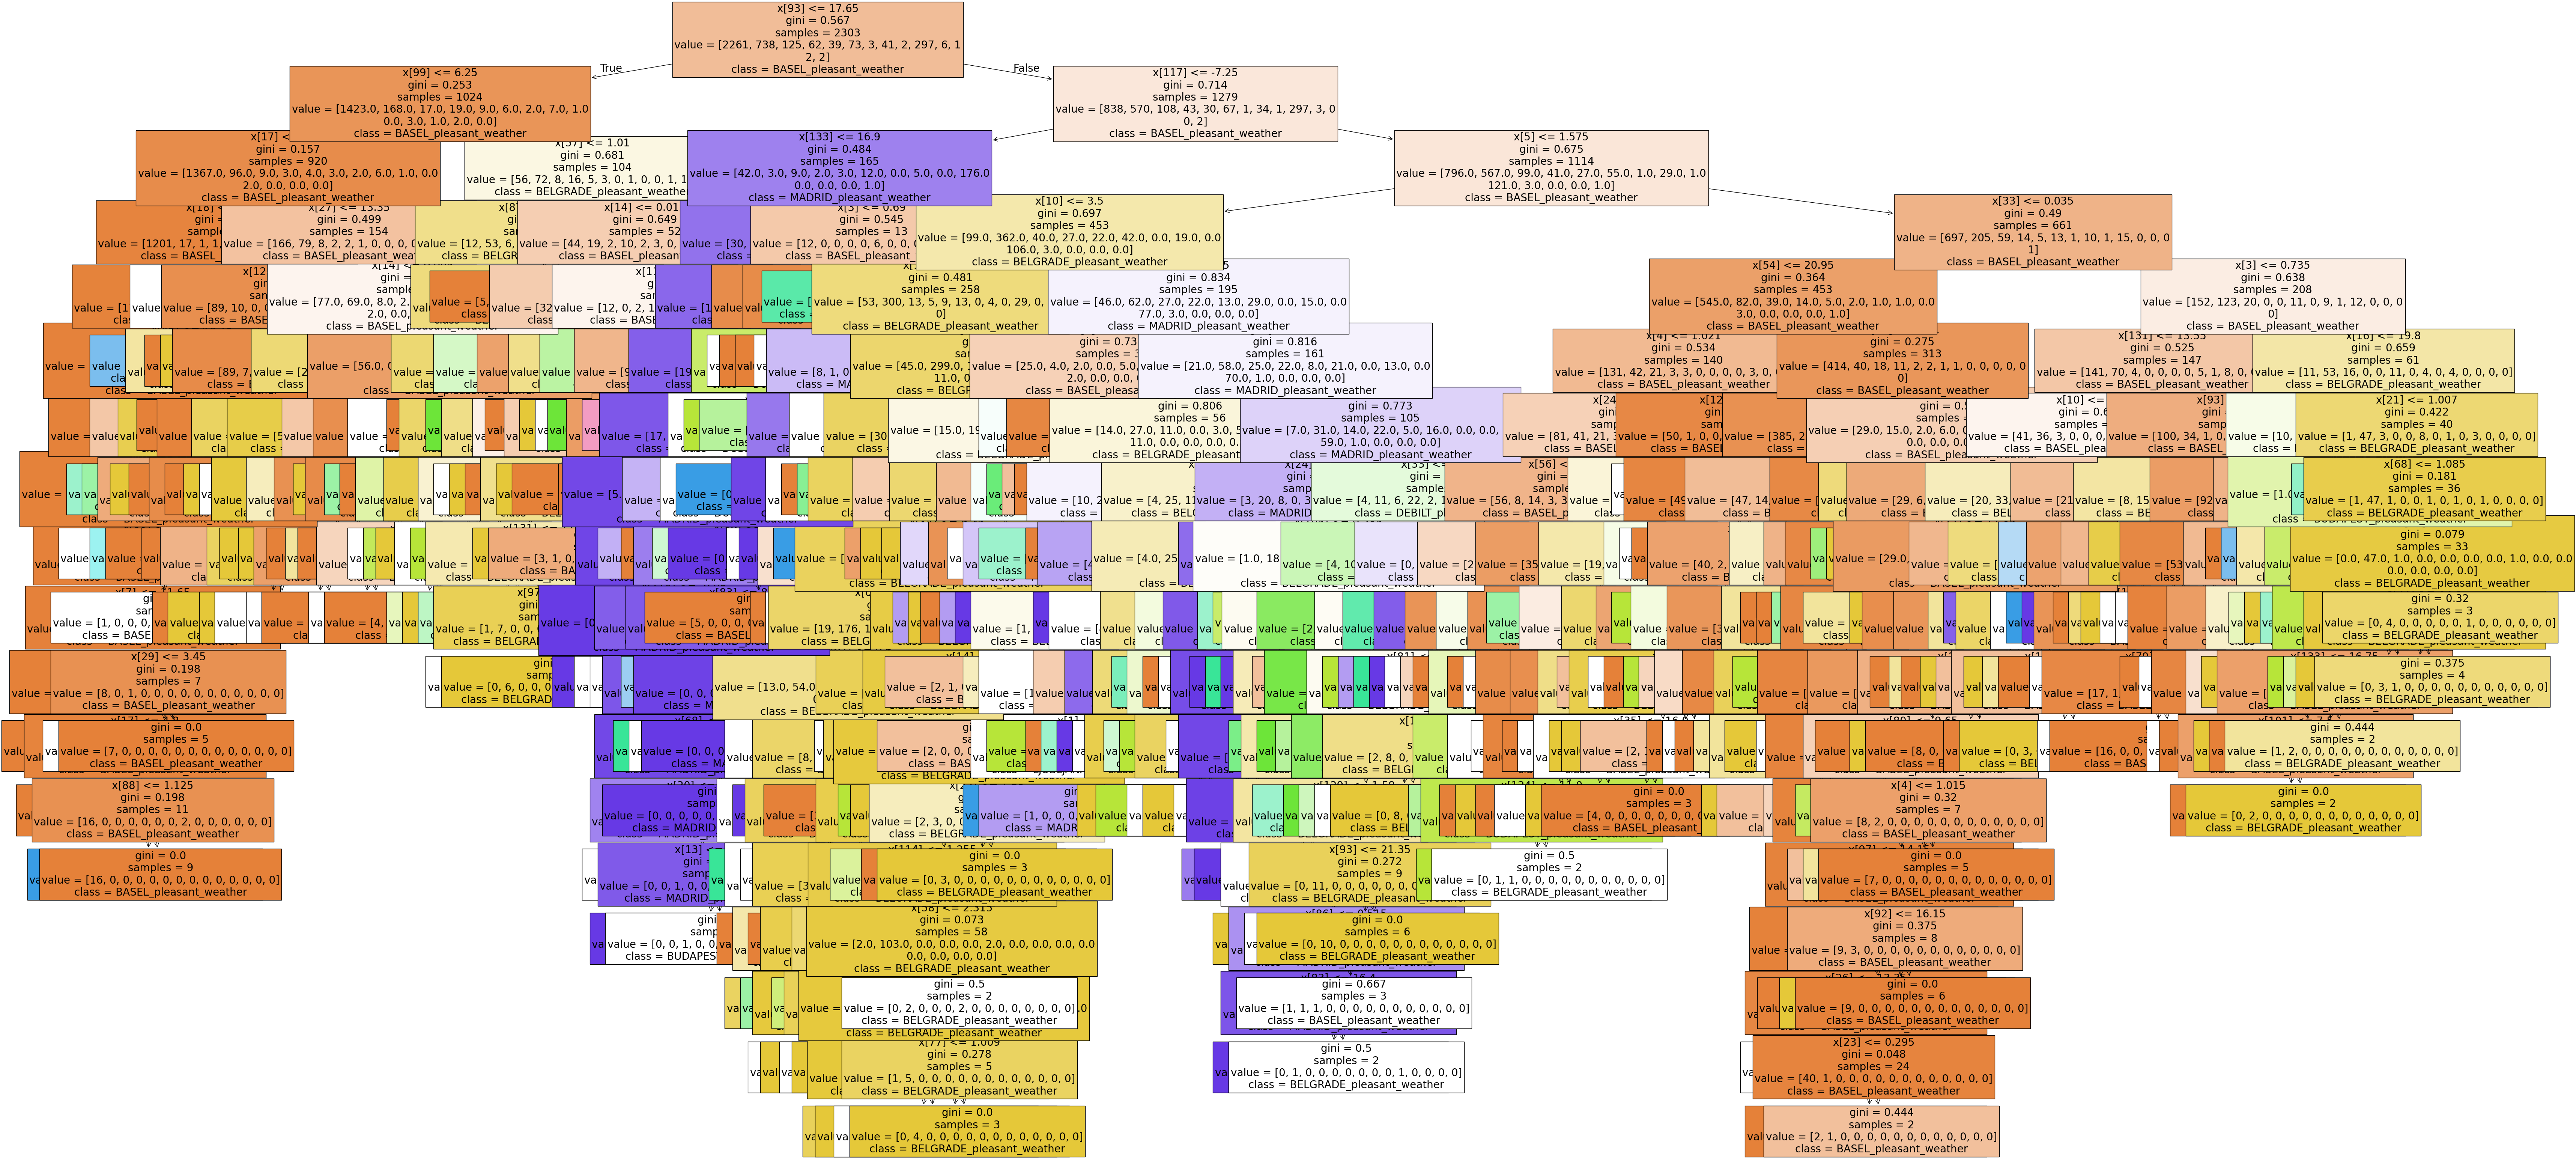

In [42]:
# We plot our chart
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=pls, filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 
plt.show()

## Feature importance

In [43]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00424362, 0.01720616, 0.00090291, 0.02035546, 0.00696196,
       0.02018668, 0.03254078, 0.01346798, 0.00515847, 0.02064321,
       0.0091896 , 0.00813139, 0.0063729 , 0.00821307, 0.04688095,
       0.0168681 , 0.0237712 , 0.01138776, 0.03151827, 0.00246197,
       0.00391444, 0.00432143, 0.00782279, 0.00809141, 0.00674908,
       0.01488388, 0.01399216, 0.01585586, 0.00192866, 0.00302012,
       0.00273026, 0.00712593, 0.00540395, 0.00561816, 0.00320057,
       0.00491451, 0.00342241, 0.00663293, 0.0023741 , 0.00334914,
       0.00329954, 0.00860116, 0.00545709, 0.00377384, 0.00426286,
       0.00384139, 0.00886947, 0.00175413, 0.0035469 , 0.00452199,
       0.00564218, 0.00435167, 0.00641264, 0.00404172, 0.00937554,
       0.0033212 , 0.00282418, 0.01038542, 0.00417824, 0.00596019,
       0.00382139, 0.00639271, 0.00361599, 0.00993001, 0.00212062,
       0.00260964, 0.00438626, 0.00723459, 0.00672238, 0.00311988,
       0.00490275, 0.01933153, 0.0053496 , 0.01417436, 0.00290

In [44]:
np.set_printoptions(threshold=1000)

In [45]:
# Reshaping to (-1, 1, 134)
newarray = newarray.reshape(-1, 1, 134)
print(newarray.shape)
newarray

(1, 1, 134)


array([[[0.00424362, 0.01720616, 0.00090291, 0.02035546, 0.00696196,
         0.02018668, 0.03254078, 0.01346798, 0.00515847, 0.02064321,
         0.0091896 , 0.00813139, 0.0063729 , 0.00821307, 0.04688095,
         0.0168681 , 0.0237712 , 0.01138776, 0.03151827, 0.00246197,
         0.00391444, 0.00432143, 0.00782279, 0.00809141, 0.00674908,
         0.01488388, 0.01399216, 0.01585586, 0.00192866, 0.00302012,
         0.00273026, 0.00712593, 0.00540395, 0.00561816, 0.00320057,
         0.00491451, 0.00342241, 0.00663293, 0.0023741 , 0.00334914,
         0.00329954, 0.00860116, 0.00545709, 0.00377384, 0.00426286,
         0.00384139, 0.00886947, 0.00175413, 0.0035469 , 0.00452199,
         0.00564218, 0.00435167, 0.00641264, 0.00404172, 0.00937554,
         0.0033212 , 0.00282418, 0.01038542, 0.00417824, 0.00596019,
         0.00382139, 0.00639271, 0.00361599, 0.00993001, 0.00212062,
         0.00260964, 0.00438626, 0.00723459, 0.00672238, 0.00311988,
         0.00490275, 0.01933153, 0

In [46]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.00424362, 0.01720616, 0.00090291, 0.02035546, 0.00696196,
       0.02018668, 0.03254078, 0.01346798, 0.00515847, 0.02064321,
       0.0091896 , 0.00813139, 0.0063729 , 0.00821307, 0.04688095,
       0.0168681 , 0.0237712 , 0.01138776, 0.03151827, 0.00246197,
       0.00391444, 0.00432143, 0.00782279, 0.00809141, 0.00674908,
       0.01488388, 0.01399216, 0.01585586, 0.00192866, 0.00302012,
       0.00273026, 0.00712593, 0.00540395, 0.00561816, 0.00320057,
       0.00491451, 0.00342241, 0.00663293, 0.0023741 , 0.00334914,
       0.00329954, 0.00860116, 0.00545709, 0.00377384, 0.00426286,
       0.00384139, 0.00886947, 0.00175413, 0.0035469 , 0.00452199,
       0.00564218, 0.00435167, 0.00641264, 0.00404172, 0.00937554,
       0.0033212 , 0.00282418, 0.01038542, 0.00417824, 0.00596019,
       0.00382139, 0.00639271, 0.00361599, 0.00993001, 0.00212062,
       0.00260964, 0.00438626, 0.00723459, 0.00672238, 0.00311988,
       0.00490275, 0.01933153, 0.0053496 , 0.01417436, 0.00290

In [47]:
#Trim sumarray to match signals
important = pd.Series(sumarray[:-1], index=signals).sort_values(ascending=False)
important

BELGRADE_sunshine       0.046881
MUNCHENB_cloud_cover    0.045247
MADRID_temp_min         0.032901
BASEL_temp_mean         0.032541
BUDAPEST_cloud_cover    0.031518
                          ...   
DEBILT_wind_speed       0.001929
HEATHROW_humidity       0.001754
OSLO_wind_speed         0.001689
VALENTIA_humidity       0.001482
BASEL_humidity          0.000903
Length: 133, dtype: float64

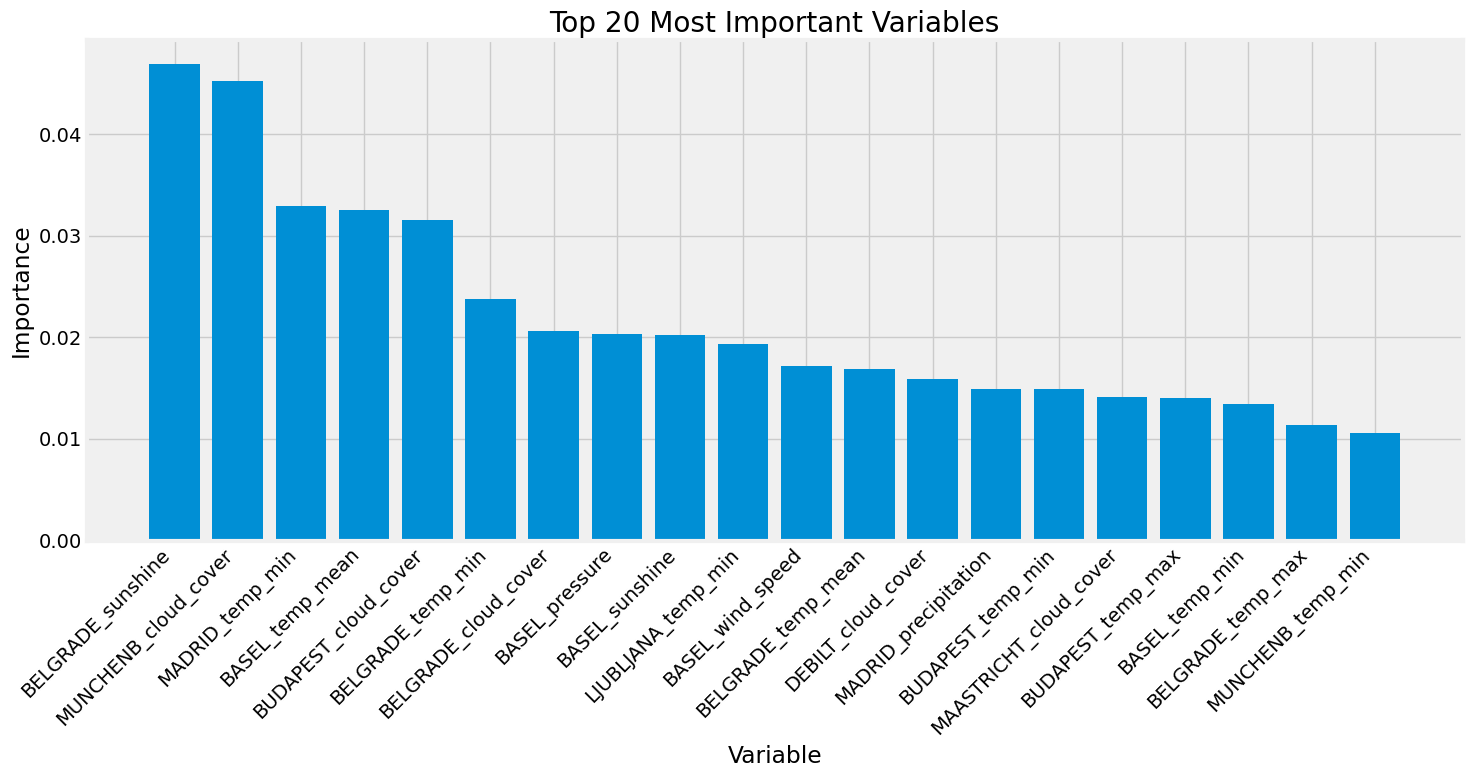


Top features and their importance scores:
BELGRADE_sunshine         0.046881
MUNCHENB_cloud_cover      0.045247
MADRID_temp_min           0.032901
BASEL_temp_mean           0.032541
BUDAPEST_cloud_cover      0.031518
BELGRADE_temp_min         0.023771
BELGRADE_cloud_cover      0.020643
BASEL_pressure            0.020355
BASEL_sunshine            0.020187
LJUBLJANA_temp_min        0.019332
BASEL_wind_speed          0.017206
BELGRADE_temp_mean        0.016868
DEBILT_cloud_cover        0.015856
MADRID_precipitation      0.014888
BUDAPEST_temp_min         0.014884
MAASTRICHT_cloud_cover    0.014174
BUDAPEST_temp_max         0.013992
BASEL_temp_min            0.013468
BELGRADE_temp_max         0.011388
MUNCHENB_temp_min         0.010542
dtype: float64


In [48]:
# Plotting the 20 most important variables

%matplotlib inline
import matplotlib.pyplot as plt

# Option 1: Show only top N most important variables
n_top = 20  # Adjust this number as needed
top_features = important.nlargest(n_top)

plt.figure(figsize=(15, 8))
plt.style.use('fivethirtyeight')

# Create the bar plot with top features only
x_values = list(range(len(top_features)))
plt.bar(x_values, top_features, orientation='vertical')

# Customize the plot
plt.xticks(x_values, top_features.index, rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title(f'Top {n_top} Most Important Variables')

# Adjust layout
plt.tight_layout()
plt.show()

# Optional: Print the top N features and their importance scores
print("\nTop features and their importance scores:")
print(top_features)